# Unsupervised Learning –Clustering
    1) K-means,K-means++
    2) Hierarchical Method


In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# def plot_scatter(X,  color='k', alpha=0.6):
#     #if use color index , the index must be between 0 and 1    
#     return plt.scatter(X[:, 0],
#                        X[:, 1],
#                        c=color,
#                        alpha=alpha,
#                        edgecolor='k')    


def plot_scatter(X, color="k", alpha=0.6):
    #if use color index , the index must be between 0 and 1
    return plt.scatter(X[:, 0],
                      X[:, 1],
                      c=color,
                      alpha = alpha,
                      edgecolor="k")

## Genearte sample data and visualiztion

In [66]:
# n1=5
# n2=5
# # cluster 
# x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
# y1 = np.random.normal(5, 0.5,n1)
# C1=np.array(list(zip(x1,y1)))
# # cluster 
# x2 = np.random.normal(30,10,n2)
# y2 = np.random.normal(5,0.5,n2)
# C2=np.array(list(zip(x2,y2)))

# X_train = np.concatenate((C1,C2))

# print(np.mean(C1,axis=0))
# print(np.mean(C2,axis=0))

n1 = 5
n2 = 5
#cluster
x1 = np.random.normal(60, 10, n1)  #np.random.normal(mu, sigma, size)
y1 = np.random.normal(5, 0.5, n1)
C1 = np.array(list(zip(x1, y1)))
#cluster
x2 = np.random.normal(20, 10, n2)
y2 = np.random.normal(5, 0.5, n2)
C2 = np.array(list(zip(x2, y2)))

X_train = np.concatenate((C1, C2))

print(np.mean(C1, axis=0))
print(np.mean(C2, axis=0))

[59.66950149  4.80987482]
[19.07942647  4.9243646 ]


In [67]:
# X_train 
X_train

array([[42.47243434,  5.32422413],
       [72.70753174,  4.9919845 ],
       [72.04750317,  4.72157206],
       [54.32184741,  4.13459114],
       [56.79819077,  4.87700226],
       [18.54293154,  4.6869884 ],
       [17.95712914,  5.14973474],
       [38.35750372,  4.5393379 ],
       [11.02557954,  5.08342698],
       [ 9.51398841,  5.16233501]])

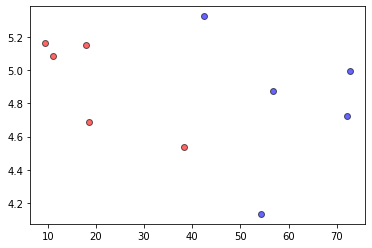

In [68]:
# plot_scatter(C1,color='b')
# plot_scatter(C2,color='r')
# plt.show()

plot_scatter(C1, color="b")
plot_scatter(C2, color="r")
plt.show()

In [69]:
# X_train
X_train

array([[42.47243434,  5.32422413],
       [72.70753174,  4.9919845 ],
       [72.04750317,  4.72157206],
       [54.32184741,  4.13459114],
       [56.79819077,  4.87700226],
       [18.54293154,  4.6869884 ],
       [17.95712914,  5.14973474],
       [38.35750372,  4.5393379 ],
       [11.02557954,  5.08342698],
       [ 9.51398841,  5.16233501]])

In [70]:
# X_train.shape
X_train.shape

(10, 2)

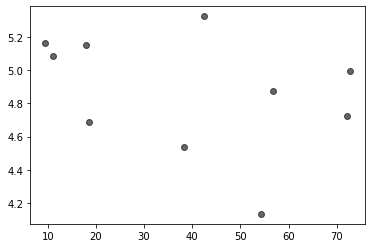

In [71]:
# plot_scatter(X_train)
# plt.show()
plot_scatter(X_train)
plt.show()

In [72]:
# print('mean:',np.mean(X_train,axis=0))
# print('std:',np.std(X_train,axis=0))

print("mean:", np.mean(X_train, axis=0))
print("std:", np.std(X_train, axis=0))

mean: [39.37446398  4.86711971]
std: [23.03090375  0.33706319]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [73]:
# kmeans = KMeans(init='random',n_clusters=2).fit(X_train)
# kmeans

kmeans = KMeans(init="random", n_clusters=2).fit(X_train)
kmeans

KMeans(init='random', n_clusters=2)

In [74]:
# kmeans.predict([[80, 0], [100, 3]])
kmeans.predict([[80, 0], [100, 3]])


array([1, 1], dtype=int32)

In [75]:
# kmeans.predict([[28, 5]])
kmeans.predict([[28, 5]])

array([0], dtype=int32)

In [76]:
# kmeans.predict(X_train)
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

In [77]:
# kmeans.cluster_centers_
kmeans.cluster_centers_

array([[14.25990716,  5.02062128],
       [56.11750186,  4.76478533]])

In [78]:
# X_train
X_train

array([[42.47243434,  5.32422413],
       [72.70753174,  4.9919845 ],
       [72.04750317,  4.72157206],
       [54.32184741,  4.13459114],
       [56.79819077,  4.87700226],
       [18.54293154,  4.6869884 ],
       [17.95712914,  5.14973474],
       [38.35750372,  4.5393379 ],
       [11.02557954,  5.08342698],
       [ 9.51398841,  5.16233501]])

In [79]:
# kmeans.labels_
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [80]:
# kmeans.predict(X_train)
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

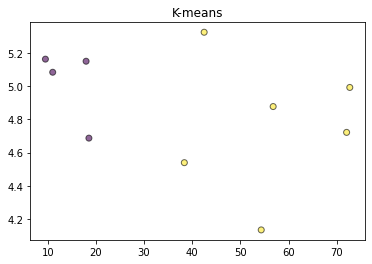

In [81]:
# plot_scatter(X_train,kmeans.predict(X_train))
# plt.title("K-means")
# plt.show()

plot_scatter(X_train, kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [82]:
# kmeans.cluster_centers_
kmeans.cluster_centers_

array([[14.25990716,  5.02062128],
       [56.11750186,  4.76478533]])

In [83]:
# kmeans.cluster_centers_[:,1]
kmeans.cluster_centers_[:,1]

array([5.02062128, 4.76478533])

In [84]:
# kmeans.predict(X_train)
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

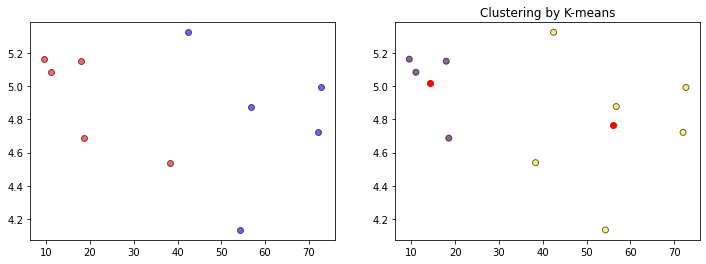

In [85]:
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# plot_scatter(C1,color='b')
# plot_scatter(C2,color='r')
# plt.subplot(122)
# plot_scatter(X_train,color=kmeans.predict(X_train))
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')
# plt.title("Clustering by K-means")
# plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1, color="b")
plot_scatter(C2, color="r")
plt.subplot(122)
plot_scatter(X_train, color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c="red")
plt.title("Clustering by K-means")
plt.show()



## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [86]:
# from sklearn.cluster import AgglomerativeClustering
# import numpy as np

from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [87]:
# acv = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
# acv

acv = AgglomerativeClustering(n_clusters=2, linkage="single").fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [90]:
# cluster_labels=acv.fit_predict(X_train)
# cluster_labels

cluster_labels = acv.fit_predict(X_train)
cluster_labels

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

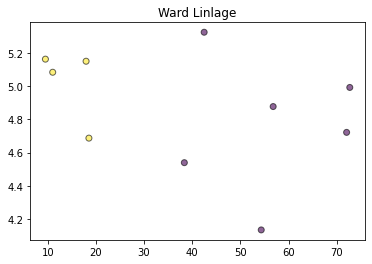

In [91]:
# plot_scatter(X_train, acv.fit_predict(X_train))
# plt.title("Ward Linkage")
# plt.show()

plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Ward Linlage")
plt.show()

In [92]:
# X_train
X_train

array([[42.47243434,  5.32422413],
       [72.70753174,  4.9919845 ],
       [72.04750317,  4.72157206],
       [54.32184741,  4.13459114],
       [56.79819077,  4.87700226],
       [18.54293154,  4.6869884 ],
       [17.95712914,  5.14973474],
       [38.35750372,  4.5393379 ],
       [11.02557954,  5.08342698],
       [ 9.51398841,  5.16233501]])

## distance matrix

In [93]:
# from sklearn.metrics import pairwise_distances
# from sklearn.datasets import make_circles,make_blobs
# D = np.round(pairwise_distances(X_train),1) 
# D

from sklearn.metrics import pairwise_distances #計算兩個樣本成對的距離
from sklearn.datasets import make_circles, make_blobs
D = np.round(pairwise_distances(X_train), 1)
D


array([[ 0. , 30.2, 29.6, 11.9, 14.3, 23.9, 24.5,  4.2, 31.4, 33. ],
       [30.2,  0. ,  0.7, 18.4, 15.9, 54.2, 54.8, 34.4, 61.7, 63.2],
       [29.6,  0.7,  0. , 17.7, 15.3, 53.5, 54.1, 33.7, 61. , 62.5],
       [11.9, 18.4, 17.7,  0. ,  2.6, 35.8, 36.4, 16. , 43.3, 44.8],
       [14.3, 15.9, 15.3,  2.6,  0. , 38.3, 38.8, 18.4, 45.8, 47.3],
       [23.9, 54.2, 53.5, 35.8, 38.3,  0. ,  0.7, 19.8,  7.5,  9. ],
       [24.5, 54.8, 54.1, 36.4, 38.8,  0.7,  0. , 20.4,  6.9,  8.4],
       [ 4.2, 34.4, 33.7, 16. , 18.4, 19.8, 20.4,  0. , 27.3, 28.9],
       [31.4, 61.7, 61. , 43.3, 45.8,  7.5,  6.9, 27.3,  0. ,  1.5],
       [33. , 63.2, 62.5, 44.8, 47.3,  9. ,  8.4, 28.9,  1.5,  0. ]])

In [94]:
# D.shape[0]
D.shape[0]

10

In [97]:
# def min_dist(D):
#     minimum=10000  
#     min_x=0
#     min_y=0
#     for i in range(D.shape[0]):
#         for j in range(i):           
#             if D[i][j]<minimum:         
#                 minimum=D[i][j]
#                 min_x=i
#                 min_y=j
#                 #print(i,j,D[i][j])
                
#     return (min_x,min_y),minimum

def min_dist(D):
    minimum = 10000
    min_x = 0
    min_y = 0
    for i in range(D.shape[0]):
        for j in range(i):
            if D[i][j] < minimum:
                minimum = D[i][j]
                min_x = i
                min_y = j
                #print(i, j, D[i][j])
    return (min_x, min_y), minimum

In [98]:
# min_dist(D)
min_dist(D)

((2, 1), 0.7)

## plot dendrogram (樹狀圖)

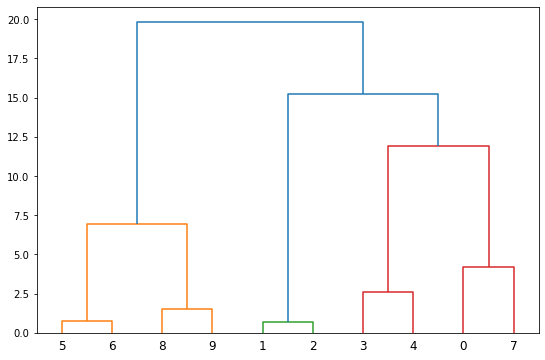

In [101]:
# from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt
# plt.figure(figsize=(9, 6))

# def plot_dendrogram(x, method='ward'):
#     Z = linkage(x, method)
#     dendrogram(Z)

# plot_dendrogram(X_train,'single')
# plt.show()

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method="ward"):
    Z = linkage(x, method)
    dendrogram(Z)
    
plot_dendrogram(X_train, "single")
plt.show()


## Comparing different hierarchical linkage methods

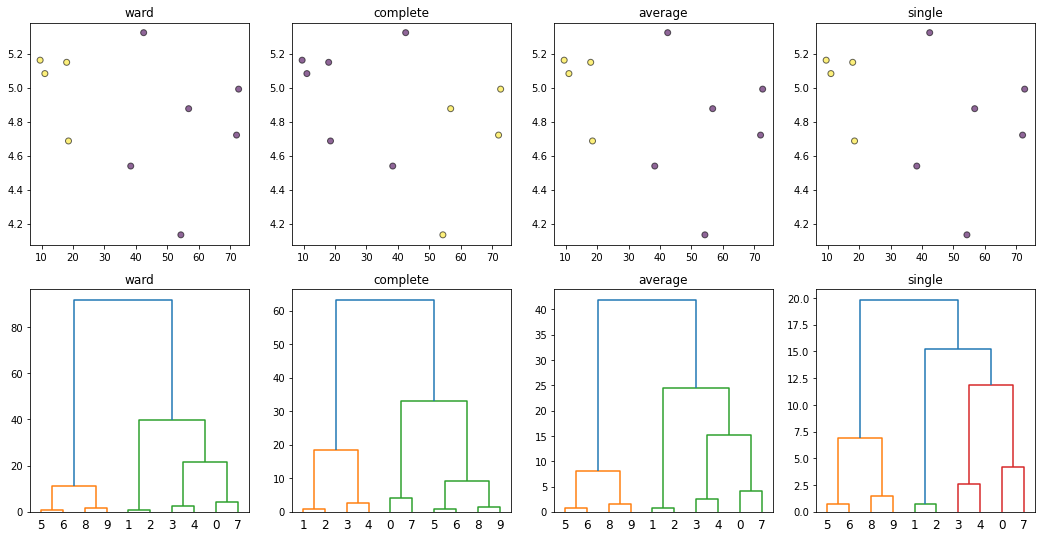

In [102]:

# def compare_linkage(X):
    
#     plt.figure(figsize=(18, 9))
#     linktype=['ward', 'complete', 'average', 'single']

#     for i,link in enumerate(linktype):
#         model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
#         cluster_labels=model.fit_predict(X)   
#         #plot scatter 
#         plt.subplot(2,4,i+1)        
#         plot_scatter(X, cluster_labels)
#         plt.title(link)
#         # plot dendrogram
#         plt.subplot(2,4,i+5)        
#         plot_dendrogram(X,link)
#         plt.title(link)   

#     plt.show()     
    
# compare_linkage(X_train)

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=["ward", "complete", "average", "single"]
    
    for i, link in enumerate(linktype): #link讀位置
        model = AgglomerativeClustering(n_clusters=2, linkage=link).fit(X)
        cluster_labels = model.fit_predict(X)
        #plot scatter
        plt.subplot(2, 4, i+1)
        plot_scatter(X, cluster_labels)
        plt.title(link)
        #plot dendrogram
        plt.subplot(2, 4, i+5)
        plot_dendrogram(X, link)
        plt.title(link)
        
    plt.show()
    
compare_linkage(X_train)

## Apply K-means with re-scaled data
### Feature Re-scale 

In [103]:
# X_train
X_train

array([[42.47243434,  5.32422413],
       [72.70753174,  4.9919845 ],
       [72.04750317,  4.72157206],
       [54.32184741,  4.13459114],
       [56.79819077,  4.87700226],
       [18.54293154,  4.6869884 ],
       [17.95712914,  5.14973474],
       [38.35750372,  4.5393379 ],
       [11.02557954,  5.08342698],
       [ 9.51398841,  5.16233501]])

[39.37446398  4.86711971]
[23.03090375  0.33706319]


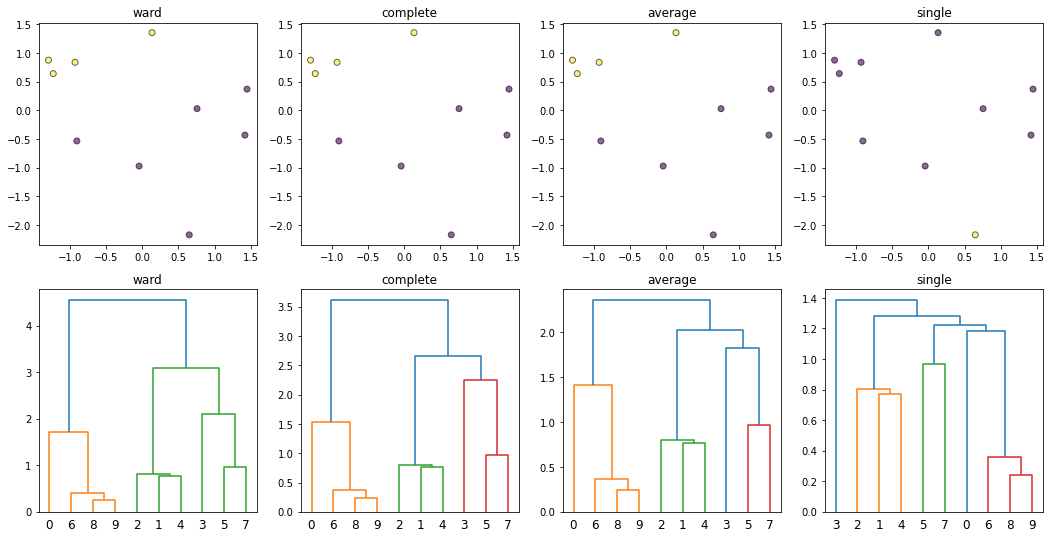

In [105]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
# print(sc.mean_)  #mean
# print(sc.scale_) #standard deviation

# #transform: (x-u)/std.
# X_train_std = sc.transform(X_train)

# np.round(np.mean(X_train_std,axis=0),2)

# compare_linkage(X_train_std)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train) #Compute the statistics to be used for later scaling.
print(sc.mean_) #mean
print(sc.scale_) #standar deviation

#transform: (x - u) / std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std, axis=0), 2)

compare_linkage(X_train_std)

In [107]:
# from sklearn.datasets import make_circles
# # make a synthetic dataset (circle) #array of shape [n_samples, 2]
# X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

from sklearn.datasets import make_circles
#make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True, factor=0.5, random_state=0, noise=0.05)

In [108]:
# print(X[:10])
# print(y[:10])

print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


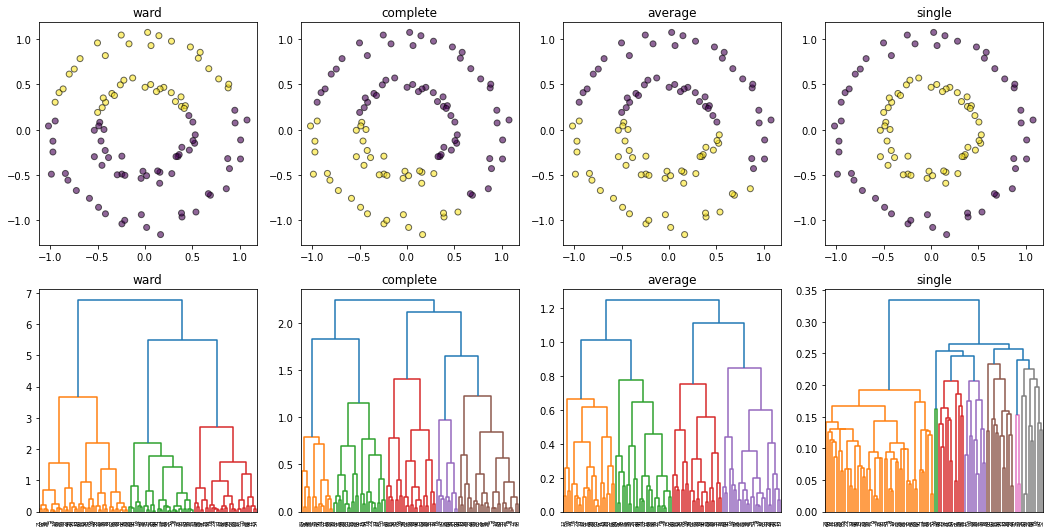

In [110]:
# compare_linkage(X)
compare_linkage(X)